## A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [4]:
#Read 
file = 'boc_60s/data_1mn_only_9.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(2610, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.973852,15.241684,6.561033,0.209467,0.099769,40.113995,92.258217,3.828625,3.928581,23.620573,...,2.005996,0.816491,0.600149,0.599208,0.644977,0.605547,0.218968,434.193115,0.894431,suaraarchive
1,0.845514,13.606594,6.747582,0.223374,0.127993,85.260719,293.569611,4.353414,6.292721,27.398996,...,2.268897,0.800510,0.632204,0.614561,0.617318,0.444468,0.210647,434.193115,0.871546,suaraarchive
2,0.983420,16.460978,6.516841,0.184354,0.097621,42.164883,72.671600,4.447002,3.853426,23.220419,...,2.236997,0.670242,0.488719,0.488148,0.510505,0.618579,0.255614,434.193115,0.959938,suaraarchive
3,0.980145,17.266909,5.684462,0.221306,0.113810,99.341904,172.213898,6.241006,5.803489,28.145836,...,2.128602,0.742582,0.561713,0.552738,0.533898,0.556901,0.248205,434.193115,0.920206,suaraarchive
4,0.968131,16.580261,5.724488,0.276339,0.131949,61.837444,88.087769,5.371401,4.157854,17.172897,...,2.445671,0.878275,0.636734,0.643256,0.654443,0.542757,0.218663,434.193115,0.896280,suaraarchive


In [5]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

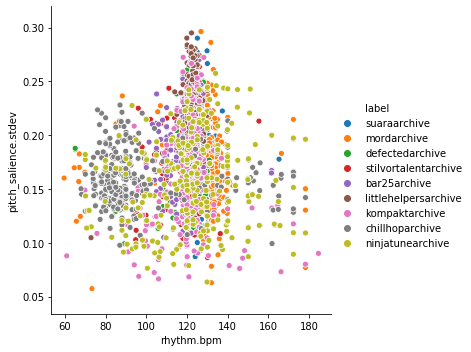

In [6]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

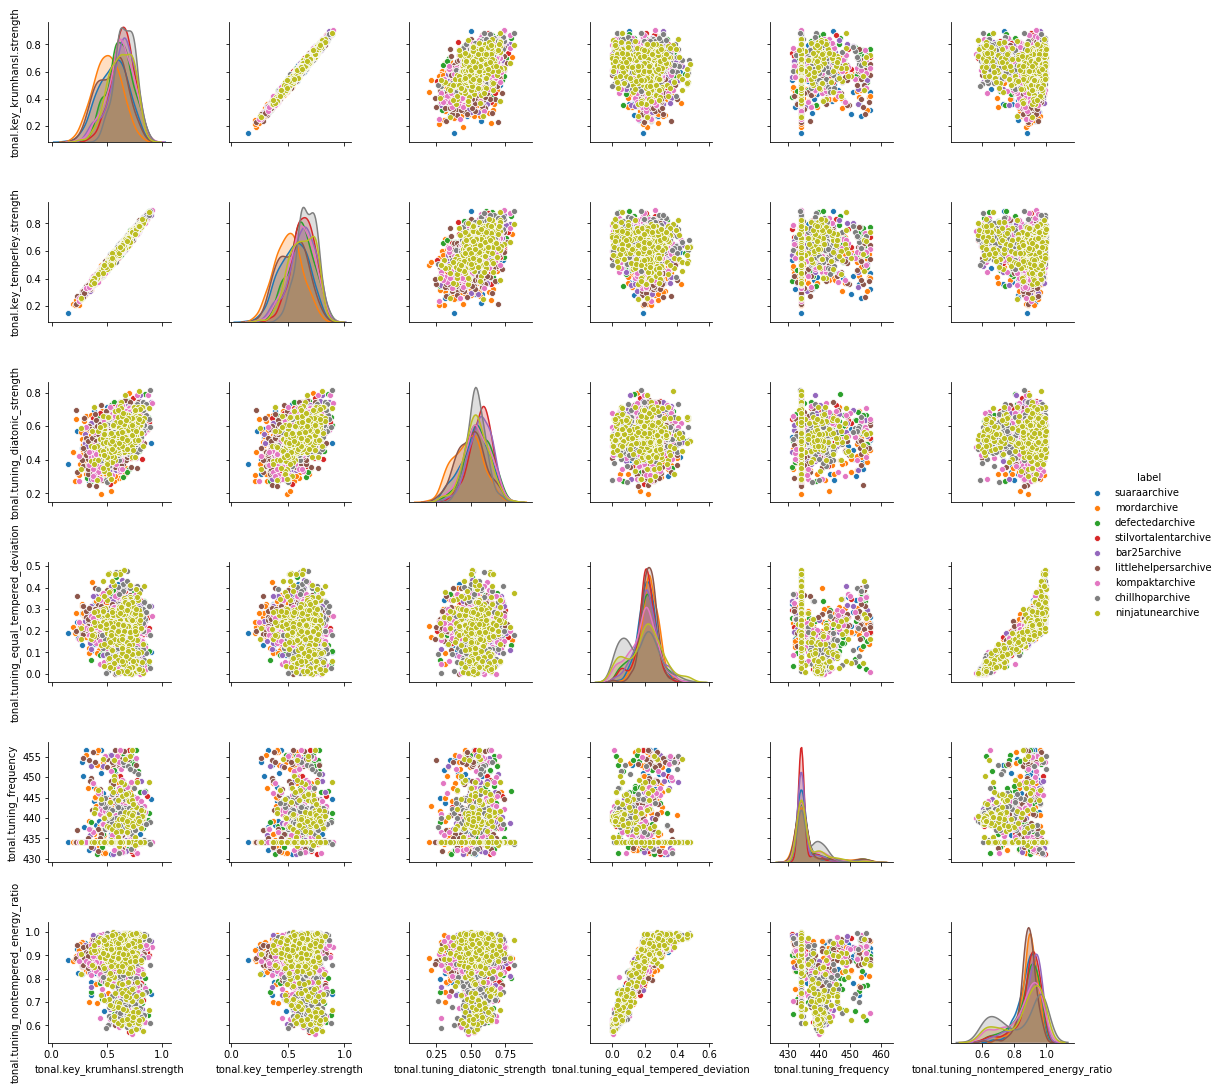

In [7]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [8]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,...,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,0.911667,15.066636,5.755354,0.244469,0.102657,56.871782,125.247048,4.018763,3.838879,16.804232,...,5.768385,2.143092,0.728805,0.602497,0.602782,0.599789,0.537013,0.209246,436.301770,0.877546
std,0.142747,2.584831,1.043869,0.068220,0.032473,58.237940,154.475462,1.770589,1.903943,8.341105,...,1.083701,0.343009,0.091059,0.126162,0.126814,0.125457,0.097305,0.079373,4.639984,0.092725
min,0.000090,6.242251,1.960482,0.076715,0.018853,-0.140583,1.057721,-0.346919,0.442625,1.645402,...,3.289423,0.771853,0.423206,0.147053,0.147114,0.150550,0.196979,0.000130,431.193909,0.562107
25%,0.913456,13.345116,5.101784,0.197872,0.081347,20.109222,39.730439,2.748041,2.469054,10.794325,...,4.955827,1.903800,0.667228,0.521261,0.522244,0.516853,0.477353,0.172247,434.193115,0.846763
50%,0.963973,15.060318,5.798062,0.236258,0.100396,40.643332,82.890495,3.821417,3.558623,15.729136,...,5.581939,2.117711,0.730593,0.616610,0.612916,0.609733,0.540713,0.215858,434.193115,0.900852
75%,0.979808,16.814758,6.477913,0.283481,0.121737,70.970428,161.193298,5.017336,4.922175,21.718976,...,6.406558,2.375838,0.786189,0.693453,0.694538,0.692063,0.605074,0.255287,435.197479,0.941686
max,0.989935,23.000727,8.944250,0.570250,0.250041,704.598450,3443.637695,14.136965,17.787558,69.774208,...,11.225224,3.460423,1.075490,0.911220,0.904209,0.897430,0.814618,0.480453,456.570251,0.999596




### Preprocessing of the features

**Normalisation of the features**

In [9]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [10]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,...,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,0.920929,0.526562,0.543385,0.339903,0.362496,0.080899,0.036074,0.301417,0.195807,0.222503,...,0.312377,0.510025,0.468506,0.596000,0.601864,0.601488,0.550538,0.435366,0.201284,0.721023
std,0.144211,0.154240,0.149471,0.138227,0.140463,0.082638,0.044872,0.122245,0.109769,0.122431,...,0.136559,0.127581,0.139600,0.165098,0.167501,0.167974,0.157544,0.165248,0.182847,0.211948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922737,0.423837,0.449800,0.245489,0.270320,0.028734,0.011234,0.213683,0.116831,0.134289,...,0.209986,0.421022,0.374104,0.489694,0.495486,0.490445,0.453946,0.358337,0.118189,0.650659
50%,0.973772,0.526185,0.549500,0.323266,0.352715,0.057871,0.023771,0.287791,0.179649,0.206722,...,0.288883,0.500585,0.471247,0.614469,0.615249,0.614803,0.556530,0.449131,0.118189,0.774294
75%,0.989769,0.630875,0.646847,0.418949,0.445027,0.100904,0.046516,0.370360,0.258263,0.294642,...,0.392794,0.596594,0.556481,0.715026,0.723059,0.725034,0.660733,0.531220,0.157768,0.867631
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.98375249 0.53700784 0.65874916 ... 0.45560603 0.11818908 0.75961675]
 [0.85409803 0.4394399  0.68546091 ... 0.43828258 0.11818908 0.70730764]
 [0.99341862 0.60976467 0.65242137 ... 0.53190016 0.11818908 0.90935155]
 ...
 [0.96772217 0.35636372 0.39927027 ... 0.03168907 0.31699922 0.14406071]
 [0.96696917 0.43594996 0.44854091 ... 0.58954636 0.11818908 0.94120384]
 [0.99311603 0.40317666 0.30118509 ... 0.37176485 0.11818908 0.83193158]]
Class of the first sample:  8


In [12]:
print(y.shape)

(2610,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs       Score
49                 silence_rate_60dB.stdev  124.816700
45                 silence_rate_20dB.stdev   79.527897
75                  spectral_rolloff.stdev   76.930000
21                 erbbands_skewness.stdev   74.473607
19                 erbbands_kurtosis.stdev   68.377290
..                                     ...         ...
31        loudness_ebu128.short_term.stdev    8.870687
108                 tonal.tuning_frequency    7.877563
107  tonal.tuning_equal_tempered_deviation    7.857591
98             tonal.chords_strength.stdev    6.880521
96                tonal.chords_number_rate    6.538634

[100 rows x 2 columns]


In [14]:
X_new = bestfeatures.fit_transform(x, y)

In [15]:
print ( X_new.shape)

(2610, 100)


In [16]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [17]:
#All output values: 
print(y)

[8 8 8 ... 6 6 6]


**Splitting data into train and test subsets**

In [18]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [19]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (2088, 100) , Size of train output vector:  (2088,)
Size of test features matrix:  (522, 100) , Size of test output vector:  (522,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [57]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 1}


**Testing the model**



In [58]:
y_pred = clf.predict(X_test)

In [59]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [60]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.603448275862069


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

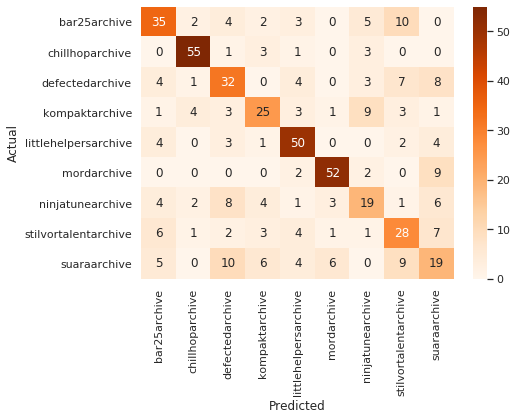

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        61
           1       0.85      0.87      0.86        63
           2       0.51      0.54      0.52        59
           3       0.57      0.50      0.53        50
           4       0.69      0.78      0.74        64
           5       0.83      0.80      0.81        65
           6       0.45      0.40      0.42        48
           7       0.47      0.53      0.50        53
           8       0.35      0.32      0.34        59

    accuracy                           0.60       522
   macro avg       0.59      0.59      0.59       522
weighted avg       0.60      0.60      0.60       522



In [63]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.39655172413793105

## Other ML FW


In [ ]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma = 1 / (X_train.shape[-1] * X_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "Gaussian Process","Neural Net", "Naive Bayes"] #"RBF SVM"

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [27]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (2088, 9)
One-hot encoded y_test shape =  (522, 9)


**Let's define our deep learning architecture**

In [28]:
!pip3 install keras

You should consider upgrading via the '/mnt/vmdata/users/gnaimeh/geo/bin/python3 -m pip install --upgrade pip' command.


In [21]:
!pip3 install tensorflow

In [29]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 50))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

Using TensorFlow backend.


You can have a look at the summary of the model

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 100)               400       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               11110     
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
activation_1 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)               

Let's pick an optimizer, compile the model and train the network

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['acc'])

In [31]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0,)

Testing the trained model

In [32]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0858323873231237
Test accuracy: 0.6340996026992798


It is a good and common practice to check the learning curves

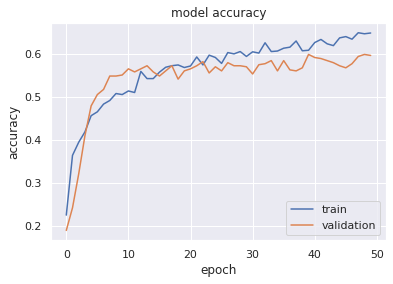

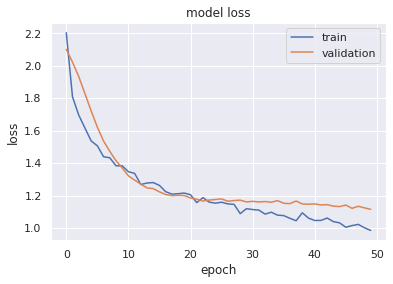

In [34]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [35]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

550


In [36]:
y_pred = y.argmax(axis=1)

In [37]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.6398467432950191

In [38]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.36015325670498083

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        61
           1       0.90      0.97      0.93        63
           2       0.47      0.56      0.51        59
           3       0.63      0.58      0.60        50
           4       0.73      0.80      0.76        64
           5       0.84      0.78      0.81        65
           6       0.52      0.29      0.37        48
           7       0.47      0.47      0.47        53
           8       0.54      0.56      0.55        59

    accuracy                           0.64       522
   macro avg       0.63      0.62      0.62       522
weighted avg       0.64      0.64      0.63       522



**Saving the model**

In [52]:
model.save("boc_60s/kerasmodel60s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [58]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_60s/kerasmodel60s.h5')
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 1)                 111       
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 3)                 6         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3)                

In [ ]:
# load dataset
dataset = loadtxt("boc_60s/data_1mn_only_9.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))